
# jets picked vs real jets

Imports, open file

In [1]:
import os
import sys
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="5"
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout
sys.path.append(os.path.realpath("../"))
import ptetaphi_nn
import tools
import numpy as np

# get data file path
with open("/home/cmccracken/start_tf/bbb/filepath.txt", 'r') as f:
    filename = f.read()
    
s_table = tools.open_file(filename, sort_by="tag", pt_cut=40, eta_cut=2.5)

# filter for events with 3 b tags
nt3 = s_table.nbtags==3 
events = s_table[nt3]
print(len(events))

cutoff = 10  # not many events have >10 jets
# "pad" = ensure all events have same length, cut off ends if needed
events = tools.pad(events, cutoff)



Using TensorFlow backend.
777150 total events found
sorting data by tag
287645


Evaluate network

Loading model... 
Using architecture: ../models/architecture_fold_3.json 
and weights: ../models/weights_fold_3.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_____

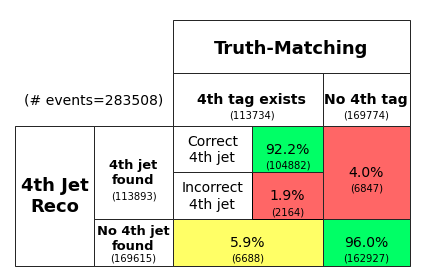

Loading model... 
Using architecture: ../models/architecture_fold_0.json 
and weights: ../models/weights_fold_0.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_____

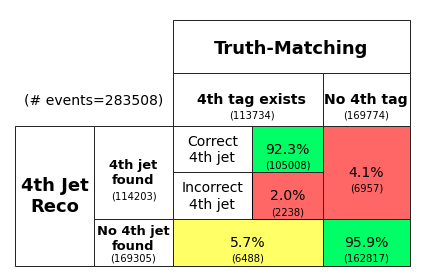

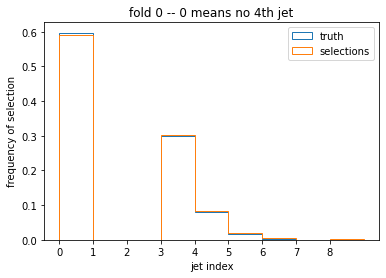

Loading model... 
Using architecture: ../models/architecture_fold_1.json 
and weights: ../models/weights_fold_1.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_____

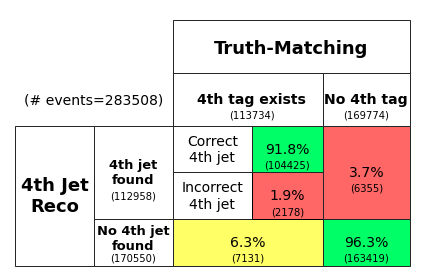

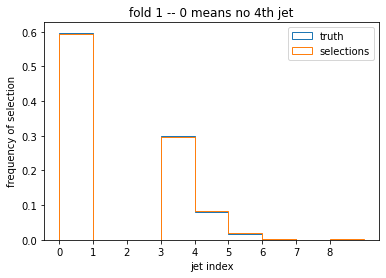

Loading model... 
Using architecture: ../models/architecture_fold_2.json 
and weights: ../models/weights_fold_2.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_____

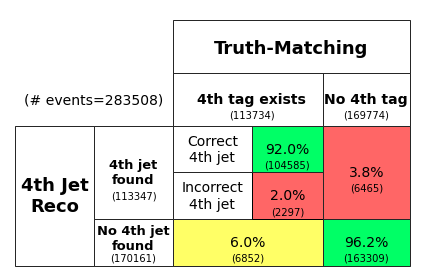

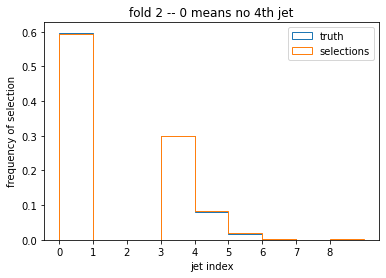

Loading model... 
Using architecture: ../models/architecture_fold_3.json 
and weights: ../models/weights_fold_3.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_____

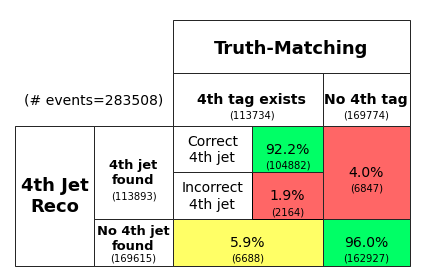

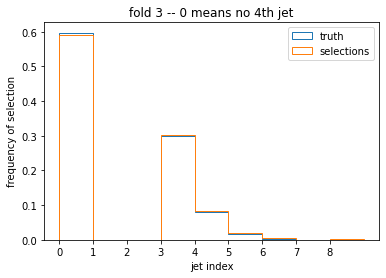

Loading model... 
Using architecture: ../models/architecture_fold_4.json 
and weights: ../models/weights_fold_4.h5
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 700)               21700     
_________________________________________________________________
dropout_1 (Dropout)          (None, 700)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               350500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               150300    
_____

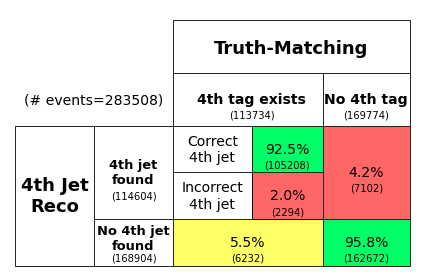

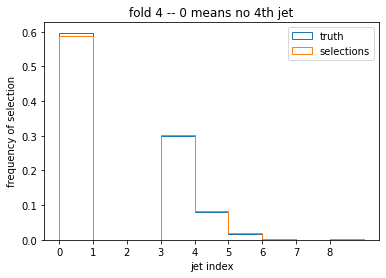

In [34]:
import matplotlib.pyplot as plt

for fold in range(5):

    # make network
    nn = ptetaphi_nn.PtEtaPhiNN(
        events, 
        load=(f"../models/architecture_fold_{fold}.json", f"../models/weights_fold_{fold}.h5"),
        njets=10, chop=0, print_summary=True)
    # evaluate
    selections = nn.evaluate(events)
    truth = events.truth
    tag = events.tag

    # get jet numbers of true vs selected jets
    truth_ints = np.zeros(len(events))
    select_ints = np.zeros(len(events))
    for i in range(len(events)):
        fourth_exists = any(truth[i,3:] == 1)
        made_selection = any(selections[i] == 1)
        if fourth_exists:
            truth_ints[i] = np.argmax(truth[i,3:])+3
        if made_selection:
            select_ints[i] = np.argmax(selections[i])
    # make histogram
    plt.hist(truth_ints, bins=int(max(truth_ints)), density=True, label='truth', histtype='step')
    plt.hist(select_ints, bins=int(max(select_ints)), density=True, label='selections', histtype='step')
    plt.xticks([i for i in range(int(max(max(select_ints), max(truth_ints))))])
    plt.legend(loc='best')
    plt.title(f'fold {fold} -- 0 means no 4th jet')
    plt.xlabel('jet index')
    plt.ylabel('frequency of selection')
    plt.savefig(f"histogram_fold_{fold}.png")
    plt.show()
